In [1]:
#import the things we need
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

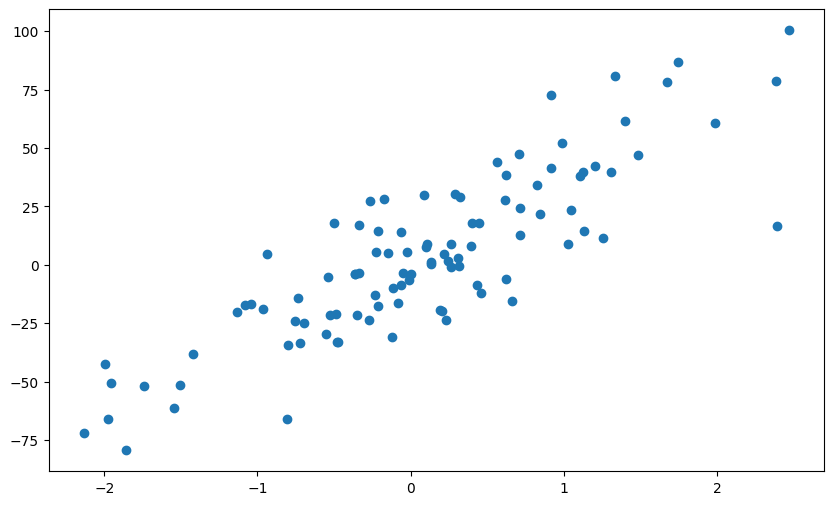

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise = 20.0, random_state = 10)
plt.figure(figsize=(10,6))
plt.scatter(X, y);

In [3]:
X_test = np.linspace(min(X),max(X),100)

In [4]:
def plot_linear(model):
    model.fit(X,y)
    print ("M :  {}, C : {}".format(model.coef_, model.intercept_))
    y_test = model.predict(X_test.reshape(-1,1))

    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(X_test.flatten(), y_test)
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))


In [5]:
from sklearn.linear_model import SGDRegressor

In [6]:
sgd=SGDRegressor(loss='squared_error',
                 penalty='l2',
                 alpha=0.0001,
                 max_iter=1000,
                 learning_rate="constant",
                 eta0=0.01
                 )

M :  [31.68472368], C : [1.3282234]


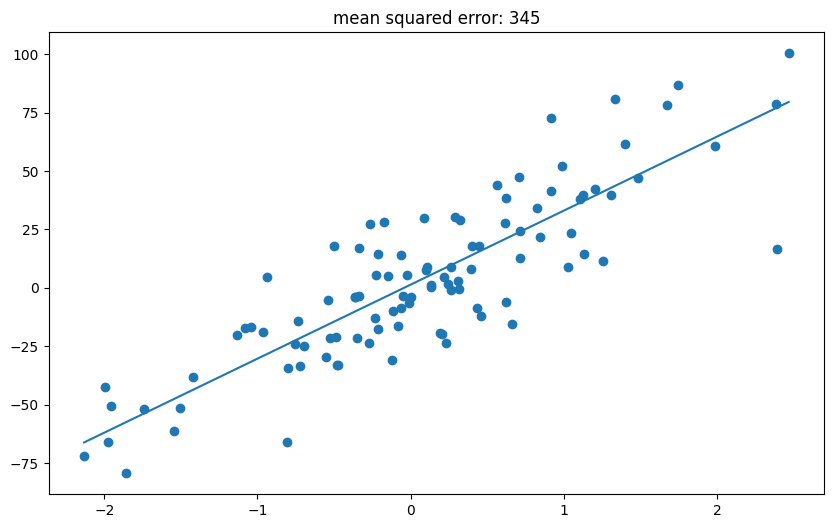

In [7]:
plot_linear(sgd)

## Polynomial Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def plot_poly(sgd,degree=3):
    model= Pipeline([('poly',PolynomialFeatures(degree=degree)),('linear',sgd)])
    model.fit(X,y)
    y_test= model.predict(X_test)
    plt.figure(figsize=(10,6))
    plt.scatter(X,y)
    plt.plot(X_test.flatten().reshape(-1,1), y_test, color = 'teal')
    plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
    plt.ylim((min(y)-10,max(y)+10))



In [9]:
from sklearn.linear_model import Ridge

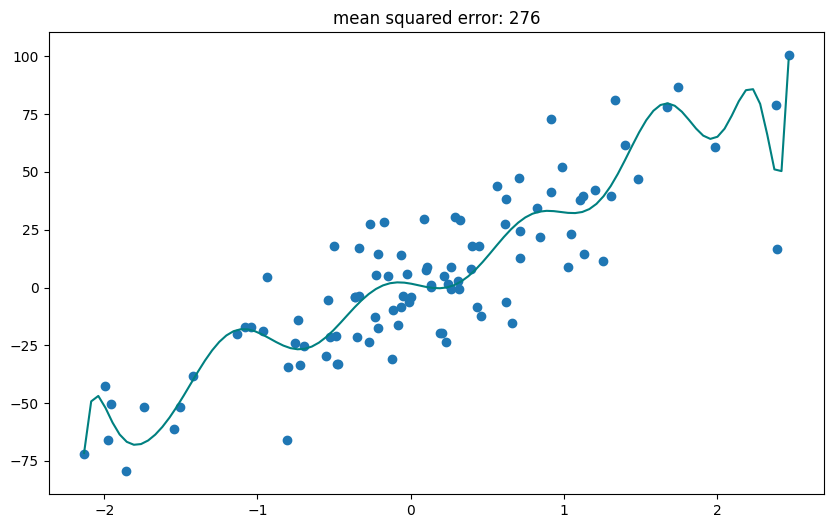

In [10]:
#without regularisation
ridge_=Ridge(alpha=0.0)
plot_poly(ridge_,degree=15)

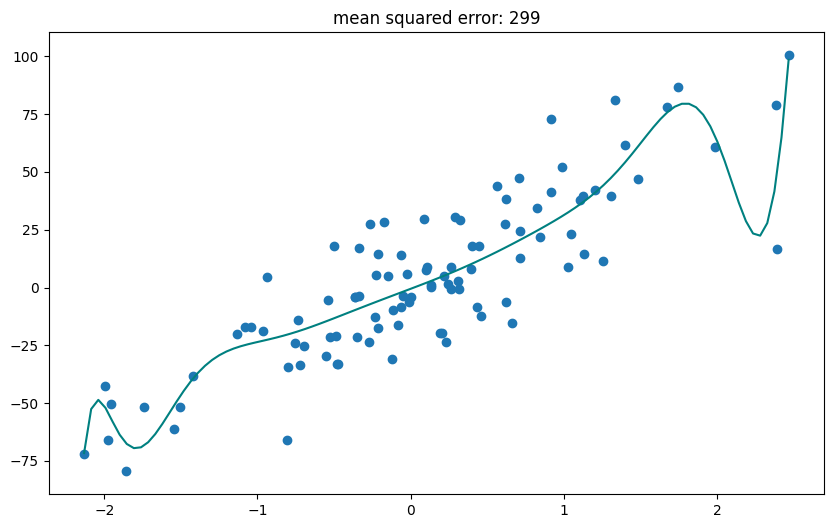

In [11]:
#with 1 regularisation
ridge_=Ridge(alpha=1.0)
plot_poly(ridge_,degree=15)